# Sheet 9 - K-means Clustering

Team name: DataFun

Members:

Fabian Frank
Jan Botsch
David Munkacsi

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 9.1 K-means Clustering

In [2]:
## 9.1 K-means Clustering
dataSet = np.loadtxt('./cluster.dat')
dataMean = dataSet.mean(axis=1).reshape((2,1))
p = dataSet.shape[1]

[ 251.  249.]


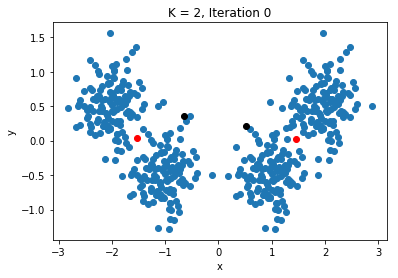

[ 250.  250.]


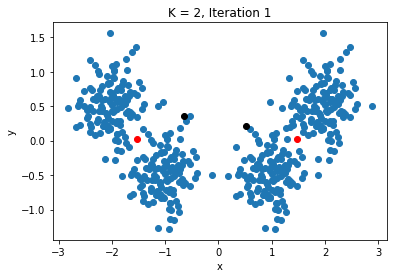

[ 250.  250.]


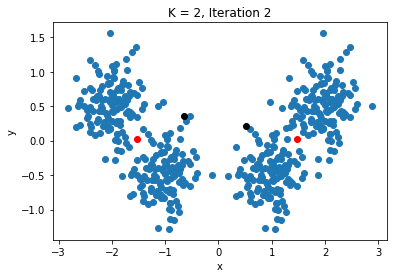

[ 250.  250.]


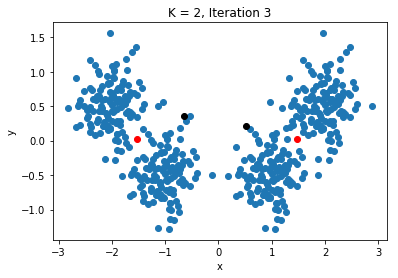

[ 250.  250.]


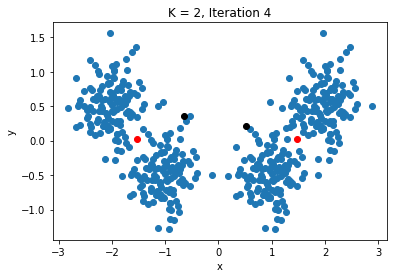

[ 186.   70.  244.]


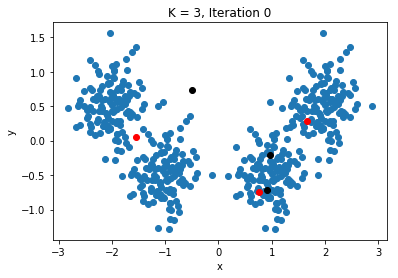

[ 144.  109.  247.]


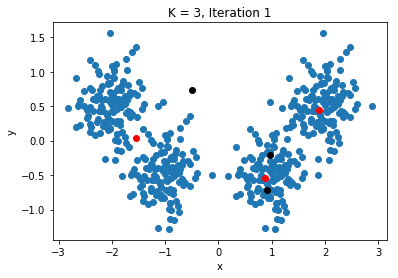

[ 132.  119.  249.]


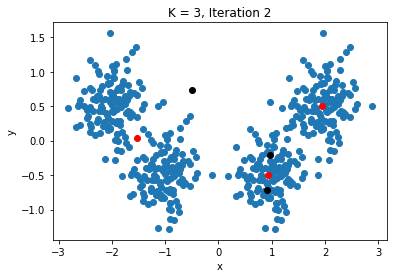

[ 129.  122.  249.]


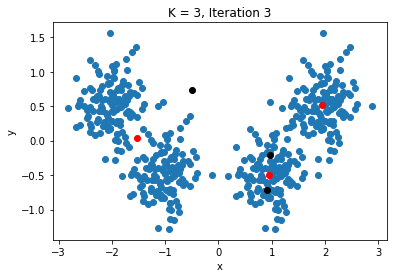

[ 128.  123.  249.]


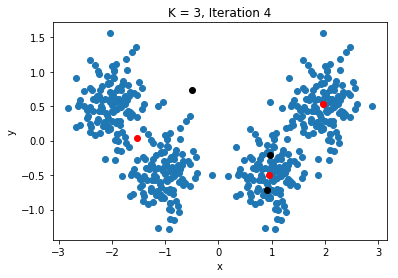

[ 224.  209.   67.    0.]


/Users/eyecuembp/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in true_divide


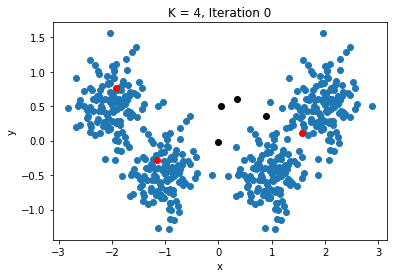

[   0.    0.    0.  500.]


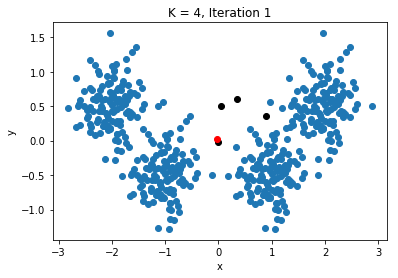

[ 500.    0.    0.    0.]


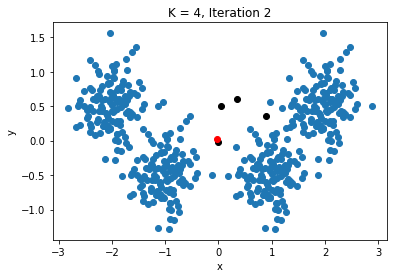

[   0.  500.    0.    0.]


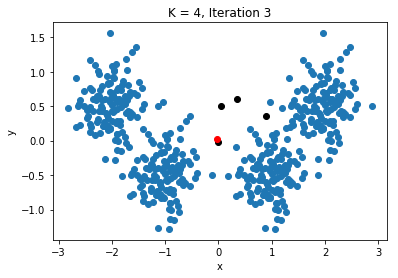

[ 500.    0.    0.    0.]


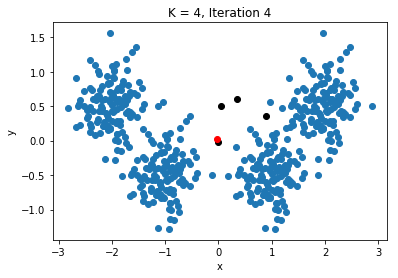

[  40.   85.    0.  212.  163.]


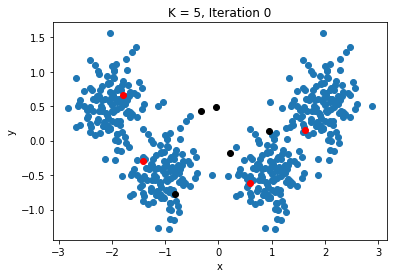

[   0.    0.  500.    0.    0.]


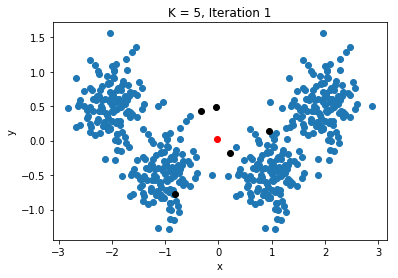

[ 500.    0.    0.    0.    0.]


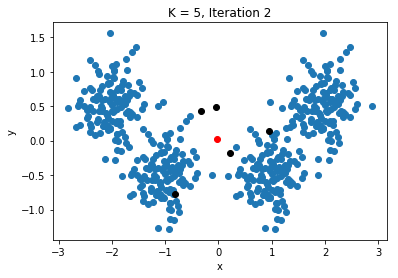

[   0.  500.    0.    0.    0.]


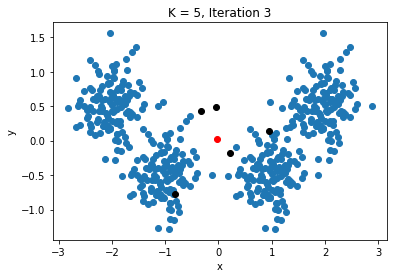

[ 500.    0.    0.    0.    0.]


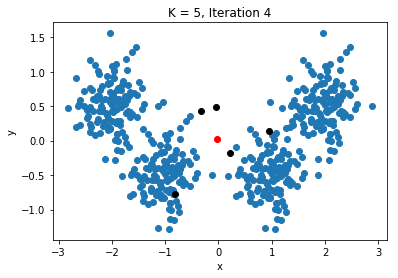

[   1.  248.  111.    3.   15.  122.]


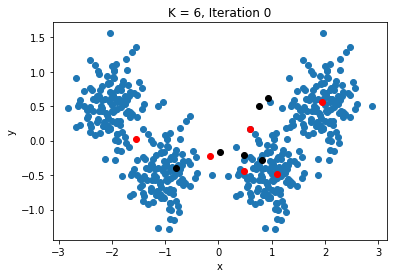

[  12.  203.   83.   47.   30.  125.]


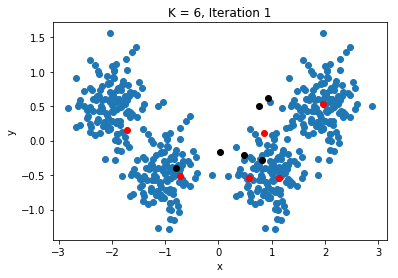

[  22.  140.   67.  110.   39.  122.]


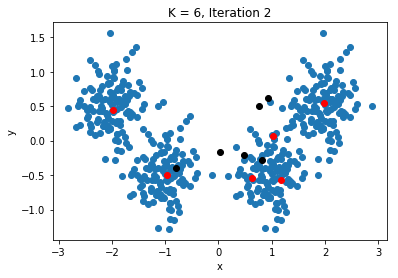

[  30.  128.   60.  121.   42.  119.]


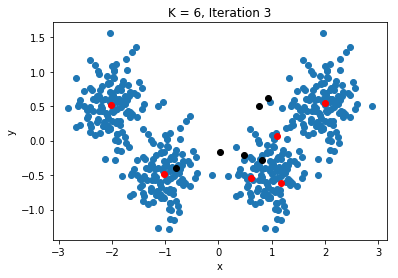

[  34.  128.   59.  121.   41.  117.]


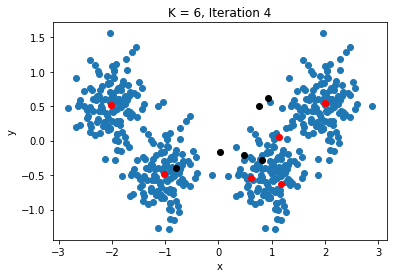

[ 148.   44.    0.  144.  102.    1.   61.]


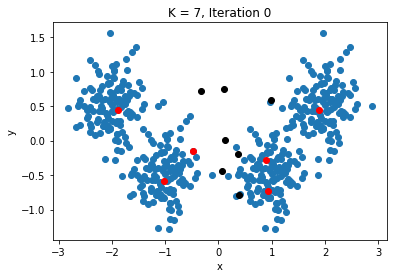

[   0.    0.  500.    0.    0.    0.    0.]


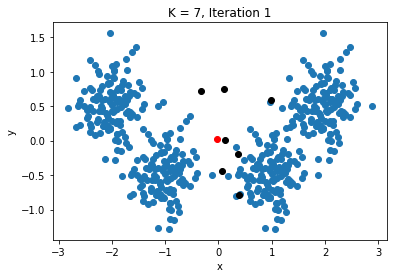

[ 500.    0.    0.    0.    0.    0.    0.]


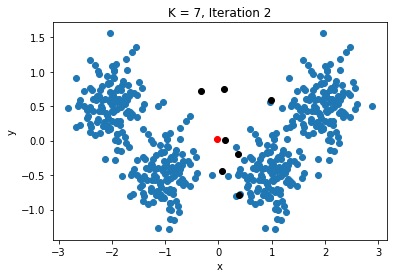

[   0.  500.    0.    0.    0.    0.    0.]


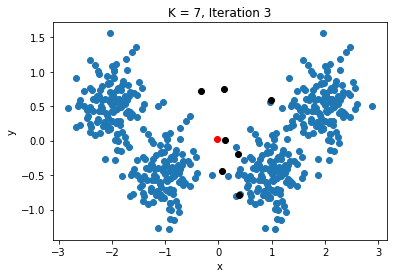

[ 500.    0.    0.    0.    0.    0.    0.]


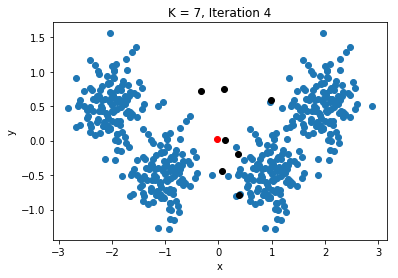

[ 133.    0.  191.   82.    0.    3.   31.   60.]


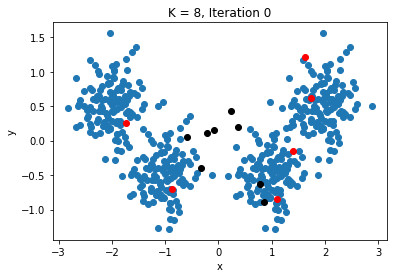

[   0.  500.    0.    0.    0.    0.    0.    0.]


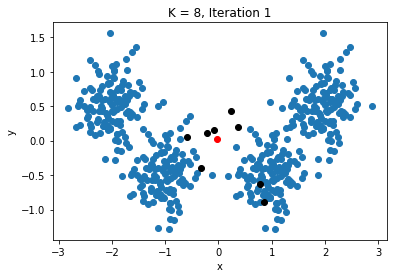

[ 500.    0.    0.    0.    0.    0.    0.    0.]


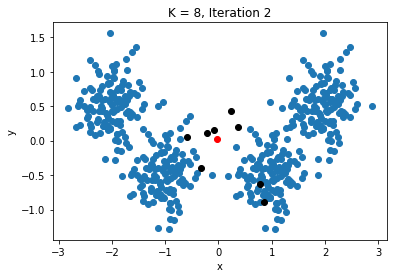

[   0.  500.    0.    0.    0.    0.    0.    0.]


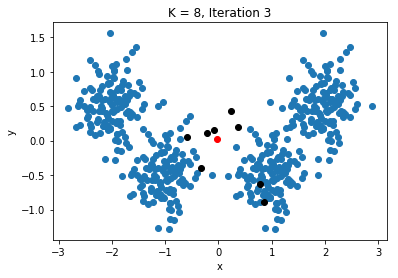

[ 500.    0.    0.    0.    0.    0.    0.    0.]


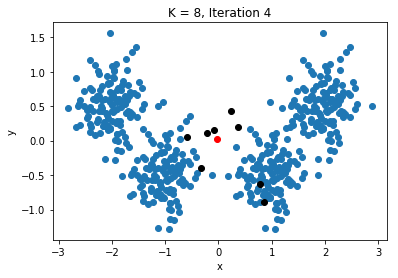

In [3]:
# Init
def init(k):
    wqInit = ((np.random.rand(2,k) - 0.5) * 2 - dataMean)
    tmax = 5
    return wqInit, tmax

# Optimization
def assignDatapoints(wq, k):
    diff = dataSet[np.newaxis,...] - wq[np.newaxis,...].T
    nor = np.linalg.norm(diff, axis=1)
    mqIdx = np.argmin(nor, axis=0)
    mq = np.zeros((dataSet.shape[1], k))
    rows = list(range(dataSet.shape[1]))
    mq[rows, mqIdx] = 1
    return mq


def choosePrototypes(mq):
    print(np.sum(mq, axis=0))
    wqNew = np.dot(dataSet, mq) / np.sum(mq, axis=0)
    return wqNew

# Error calculation
def getError(wq):
    mq = assignDatapoints(wq, wq.shape[1])
    diff = dataSet[np.newaxis,...] - wq[np.newaxis,...].T
    nor = np.linalg.norm(diff, axis=1)
    tmp = nor[np.nonzero(mq.T)]
    err = (1.0 / (2.0 * p)) * tmp.sum()
    return err

# Plot dataset
def plot(k, t):
    plt.figure()
    plt.scatter(dataSet[0], dataSet[1])
    plt.scatter(wqInit[0], wqInit[1], color='black')
    plt.scatter(wq[0], wq[1], color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('K = %d' % k + ', Iteration %d' %t)

def plotError(errArr):
    plt.figure()
    plt.plot(errArr)
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Error over Iterations')
    
for k in range(2,9):
    wqInit, tmax = init(k)
    wq = np.copy(wqInit)

    for t in range(tmax):
        mq = assignDatapoints(wq, k)
        wq = choosePrototypes(mq)
        plot(k, t)
        plt.show()

# 9.2 Online K-means Clustering

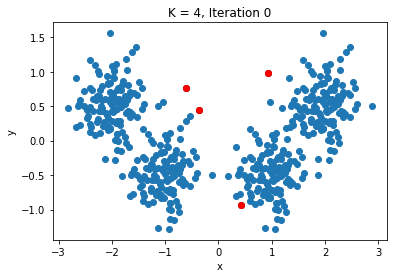

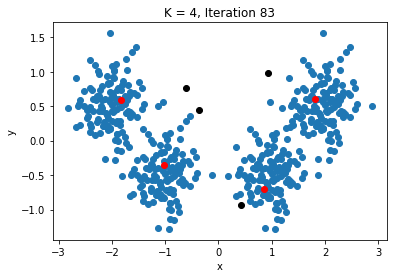

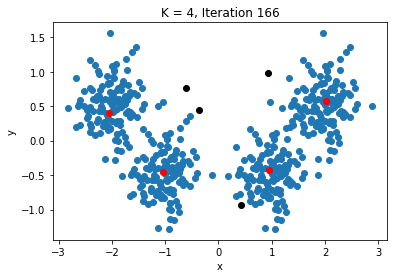

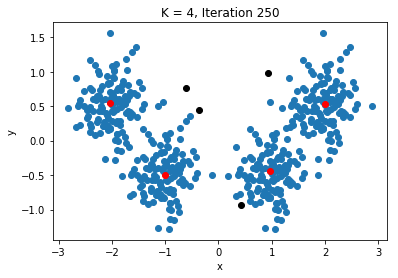

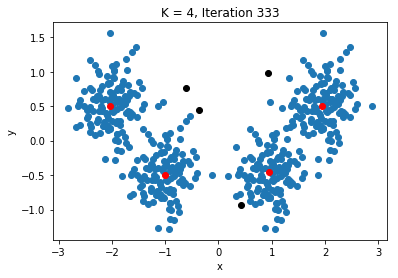

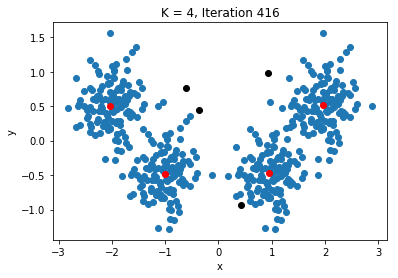

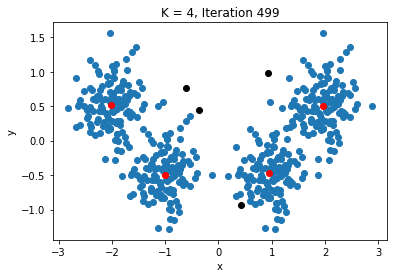

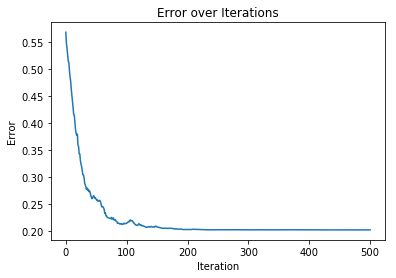

In [4]:
# Init
def initOnline(k):
    wqInit = ((np.random.rand(2,k) - 0.5 ) * 2 + dataMean)
    tmax = p
    return wqInit, tmax

# Optimization
def assignDatapointOnline(x, wq):
    diff = x - wq.T
    nor = np.linalg.norm(diff, axis=1)
    mqIdx = np.argmin(nor, axis=0)
    return mqIdx

def updatePrototypeOnline(wq, x, mqIdx, eps):
    diff = x - wq[:,mqIdx]
    dw = eps * diff
    wq[:,mqIdx] = wq[:,mqIdx] + dw
    return wq

def updateEpsilonOnline(eps,tau, tcurr, tmax):
    if t > tmax/4:
        eps = tau * eps
    return eps

#Init Online
k = 4
eps = 0.1
tau = 0.99
wqInit, tmax = initOnline(k)
wq = np.copy(wqInit)

# for plotting
itr = 1
step = (p-1)/6.0

# for Error calculation
errArr = np.zeros([tmax+1])
errArr[0] = getError(wq);

#for accessing data randomly
sfdIndices = np.random.permutation(p)

plot(k, 0)
for t in range(tmax):
    #assign datapoint to prototype
    idx = assignDatapointOnline(dataSet[:,sfdIndices[t]], wq)
    
    #update prototype position
    wq = updatePrototypeOnline(wq, dataSet[:,sfdIndices[t]], idx, eps)
    
    #update epsilon
    eps = updateEpsilonOnline(eps,tau, t, tmax)

    #get the Error
    errArr[t+1] = getError(wq)

    #plot the prototypes at certain iterations
    if (t == np.rint(itr*step)):
        plot(k, t)
        itr = itr+1

#plot the Error
plotError(errArr)
plt.show()